In [6]:
#####    Connaught Place, New Delhi     #####

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon
%matplotlib inline

In [8]:
place = "Connaught Place"
location =(28.632050, 77.219941)
network_type = 'drive'
filepath = f"C:/Users/HP/Desktop/OSMnX Work/CBD Thesis work/Delhi/{place}"

In [9]:
# Importing data from place using centre point as drivable network
G = ox.graph_from_point(location, dist = 2000, network_type = network_type)
print(place,'with Network Type :', '"',network_type,'"', ', have Nodes =',len(G.nodes),'and Edges =', len(G.edges),'.')

Connaught Place with Network Type : " drive " , have Nodes = 1595 and Edges = 3764 .


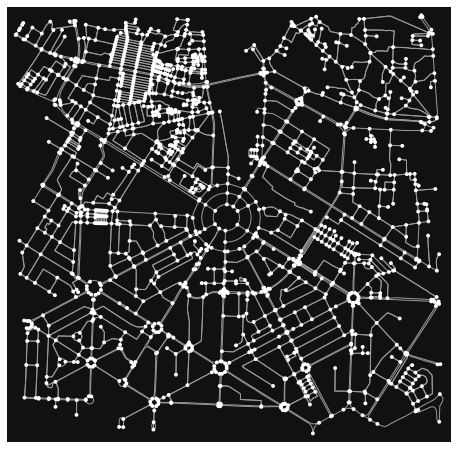

Wall time: 1.53 s


In [10]:
%%time
fig, ax=ox.plot_graph(ox.project_graph(G))

In [11]:
# save graph file to local disk as geopckage and shape file
ox.save_graph_geopackage(G, filepath = 'C:/Users/HP/Desktop/OSMnX Work/CBD Thesis work/Delhi/Connaught Place/Connaught Place.gpkg')
ox.save_graph_shapefile(G, filepath = 'C:/Users/HP/Desktop/OSMnX Work/CBD Thesis work/Delhi/Connaught Place/Connaught Place.shp')

C:\JupyterLab\resources\jlab_server\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [7]:
# Instead of downloading Map data every time, we can import data from local file fast as geodataframe
# G_local_nodes = gpd.read_file('C:/Users/HP/Desktop/OSMnX Work/Delhi Analysis/delhi.shp/nodes.shp')
# G_local_edges = gpd.read_file('C:/Users/HP/Desktop/OSMnX Work/Delhi Analysis/delhi.shp/edges.shp')

In [8]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [74]:
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

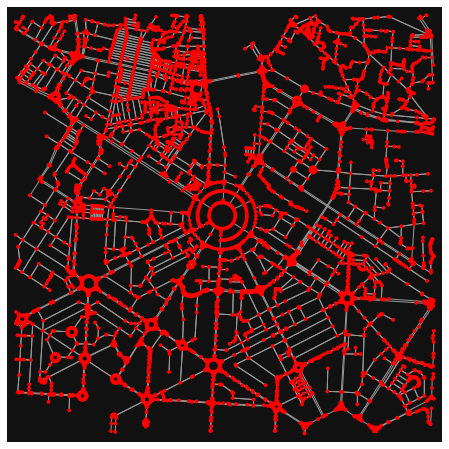

In [10]:
# create an unsimplified graph
Gn = ox.graph_from_point(location, dist = 2000, network_type = network_type, simplify = False)
fig, ax=ox.plot_graph(Gn, node_color = 'r')

In [25]:
print(place, '(unsimplified, Drive) Network','has, Nodes =',len(Gn.nodes),'and Edges =', len(Gn.edges))

Connaught Place, New Delhi (unsimplified, Drive) Network has, Nodes = 5083 and Edges = 8590


In [26]:
# save graph file to local disk as geopckage and shape file
# ox.save_graph_geopackage(Gn, filepath = 'C:/Users/HP/Desktop/OSMnX Work/CBD Thesis work/Connaught Place, New Delhi/Connaught Place_unsimply.gpkg')
# ox.save_graph_shapefile(Gn,filepath = 'C:/Users/HP/Desktop/OSMnX Work/CBD Thesis work/Connaught Place, New Delhi/Connaught Place_unsimply.shp')

C:\JupyterLab\resources\jlab_server\lib\site-packages\osmnx\io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [27]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.get_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.get_digraph(G)

In [28]:
type(D)

networkx.classes.digraph.DiGraph

In [29]:
ox.stats.circuity_avg(M)

1.0343325876764573

In [30]:
print("Now the next section shows how we can save nodes and edges saparately so that they can be accessed anytime")

Now the next section shows how we can save nodes and edges saparately so that they can be accessed anytime


In [31]:
# saving graph as nodes and edges
nodes, edges = ox.graph_to_gdfs(G)
nodes.head()

y          x  street_count highway  \
osmid                                                   
249782331  28.631635  77.221709             4     NaN   
249782337  28.630693  77.219532             3     NaN   
249782343  28.631842  77.217564             3     NaN   
249782349  28.633940  77.217678             4     NaN   
249783257  28.634113  77.222603             3     NaN   

                            geometry  
osmid                                 
249782331  POINT (77.22171 28.63163)  
249782337  POINT (77.21953 28.63069)  
249782343  POINT (77.21756 28.63184)  
249782349  POINT (77.21768 28.63394)  
249783257  POINT (77.22260 28.63411)

In [32]:
edges.tail()

osmid  oneway             name      highway  \
u          v          key                                                     
9221708424 1309626424 0     998790352    True  Firoz Shah Road    secondary   
           6702715318 0     998790354   False  Firoz Shah Road    secondary   
9234696672 1762944963 0     164675827   False         कनॉट लेन  residential   
           1762944960 0     164675827   False         कनॉट लेन  residential   
9234696675 9234696672 0    1000448884    True              NaN  residential   

                            length  \
u          v          key            
9221708424 1309626424 0     80.806   
           6702715318 0    263.635   
9234696672 1762944963 0      9.776   
           1762944960 0    107.349   
9234696675 9234696672 0    115.470   

                                                                    geometry  \
u          v          key                                                      
9221708424 1309626424 0    LINESTRING (77.22462 28.62246, 77.22471 28.622...   
           6702715318 0    LINESTRING (77.22462 28.62246, 77.22378 28.622...   
9234696672 1762944963 0    LINESTRING (77.22324 28.63056, 77.22329 28.63063)   
           1762944960 0    LINESTRING (77.22324 28.63056, 77.22280 28.629...   
9234696675 9234696672 0    LINESTRING (77.22425 28.63001, 77.22406 28.630...   

                          lanes junction access maxspeed bridge  
u          v          key                                        
9221708424 1309626424 0       2      NaN    NaN      NaN    NaN  
           6702715318 0       4      NaN    NaN      NaN    NaN  
9234696672 1762944963 0     NaN      NaN    NaN      NaN    NaN  
           1762944960 0     NaN      NaN    NaN      NaN    NaN  
9234696675 9234696672 0     NaN      NaN    NaN      NaN    NaN

In [33]:
list(nodes)

['y', 'x', 'street_count', 'highway', 'geometry']

In [34]:
edges.columns

Index(['osmid', 'oneway', 'name', 'highway', 'length', 'geometry', 'lanes',
       'junction', 'access', 'maxspeed', 'bridge'],
      dtype='object')

In [35]:
list(edges)[4]

'length'

In [36]:
edges.columns[4]

'length'

In [37]:
type(nodes)

geopandas.geodataframe.GeoDataFrame

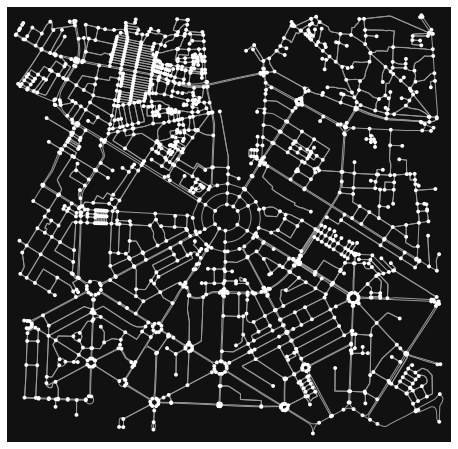

In [38]:
# Convert geodataframes (gdfs) to MultidiGraphs (Create graph from nodes and edges)
G2 = ox.graph_from_gdfs(nodes, edges, graph_attrs= G.graph)
ax = ox.plot_graph(ox.project_graph(G2))

In [39]:
# areaa of graph in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

15536011.004026571

In [40]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

{'n': 1595,
 'm': 3764,
 'k_avg': 4.71974921630094,
 'edge_length_total': 361772.401999998,
 'edge_length_avg': 96.11381562167854,
 'streets_per_node_avg': 2.946708463949843,
 'streets_per_node_counts': {0: 0, 1: 178, 2: 3, 3: 1149, 4: 256, 5: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1115987460815047,
  2: 0.0018808777429467085,
  3: 0.7203761755485893,
  4: 0.16050156739811913,
  5: 0.005642633228840125},
 'intersection_count': 1417,
 'street_length_total': 226365.8959999998,
 'street_segment_count': 2305,
 'street_length_avg': 98.20646247288495,
 'circuity_avg': 1.0347360952808136,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 855,
 'node_density_km': 102.66470586218131,
 'intersection_density_km': 91.20745342113537,
 'edge_density_km': 23286.0546961659,
 'street_density_km': 14570.400081548027,
 'clean_intersection_density_km': 55.033431669068975}

In [67]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=28.617568, Y=77.232564)
origin = list(G)[700]
destin = list(G)[100]
dest = ox.distance.nearest_nodes(G, X=288.646955, Y=777.204962)

In [64]:
print(orig,dest,"and",origin,destin)

4526814298 4526814298 and 2702568913 3947530961


In [65]:
len(G)

1595

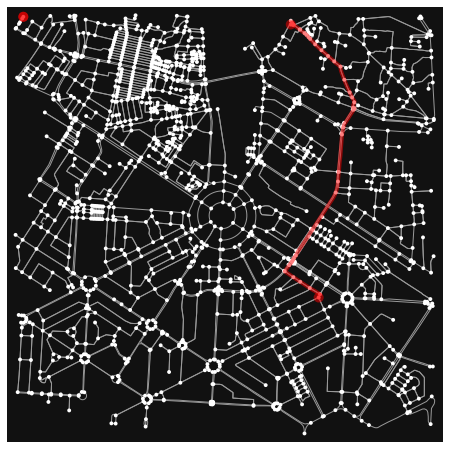

In [68]:
# find the shortest path between nodes, minimum travel time and length.
route = ox.shortest_path(G, orig, dest, weight = 'length')
route1 = ox.shortest_path(G, origin, destin, weight = 'length')
fig, ax = ox.plot_graph_routes(G, [route,route1])

In [76]:
print(route1)

[2702568913, 2702568911, 2702568907, 561316947, 6538800337, 6538800370, 6538800360, 6538800349, 7469479189, 7469479195, 1588306424, 7469479229, 7469479243, 566395083, 561316940, 9179112328, 9179118828, 561316938, 9179118820, 291542741, 2714430457, 938409716, 1763864248, 1763864297, 6234228012, 6234228039, 6234228036, 6234228031, 6234228030, 6234228028, 5434484057, 5434484022, 5434484056, 267251597, 267251601, 267251591, 267251592, 267251594]


In [83]:
# Shortest route by length
routes = ox.shortest_path(G,orig, destin, weight = 'length')

# Shortest route by travel_time
routes1 = ox.shortest_path(G,orig, destin, weight = 'travel_time')

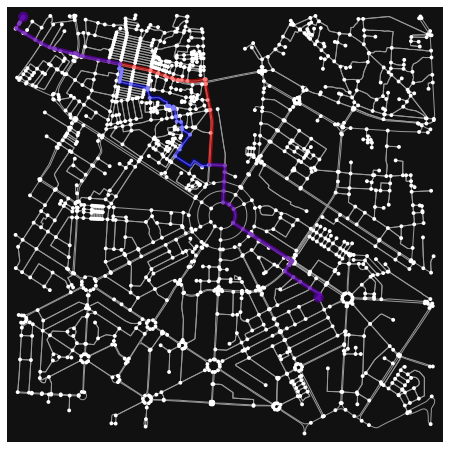

Shortest route by travel distance has, Length = 4855 meter, Travel Time = 542 seconds AND Shortest route by Travel time has, Length = 5059 meter, Travel Time = 522 seconds


In [84]:
# Plotting both routes in single graph
ax = ox.plot_graph_routes(G, routes = [routes, routes1], route_colors = ["red", "blue"])
# length and Travel Time of route
print('Shortest route by travel distance has, Length =',int(sum(ox.utils_graph.get_route_edge_attributes(G,routes,'length'))),'meter,',
      'Travel Time =',int(sum(ox.utils_graph.get_route_edge_attributes(G,routes,'travel_time'))),'seconds', 'AND',
      'Shortest route by Travel time has, Length =',int(sum(ox.utils_graph.get_route_edge_attributes(G,routes1,'length'))),'meter,',
      'Travel Time =',int(sum(ox.utils_graph.get_route_edge_attributes(G,routes1,'travel_time'))),'seconds')

In [117]:
# asigning origin and destination using osmid from QGIS Graph
o = 259081351
d = 562202340
od1 = ox.shortest_path(G, o,d, weight = 'length')
od2 = ox.shortest_path(G, o,d, weight = 'travel_time')

NodeNotFound: Source 259081351 not in G

In [46]:
# route information (proper) (km, hour)
print('Shortest route by travel distance has, Length =',(int(sum(ox.utils_graph.get_route_edge_attributes(G,od1,'length'))))/1000,'km,',
      'Travel Time =',(int(sum(ox.utils_graph.get_route_edge_attributes(G,od1,'travel_time'))))/3600,'hr.', 'AND',
      'Shortest route by Travel time has, Length =',(int(sum(ox.utils_graph.get_route_edge_attributes(G,od2,'length'))))/1000,'km,',
      'Travel Time =',(int(sum(ox.utils_graph.get_route_edge_attributes(G,od2,'travel_time'))))/3600,'hr.')

Shortest route by travel distance has, Length = 58.92 km, Travel Time = 1.3525 hr. AND Shortest route by Travel time has, Length = 60.939 km, Travel Time = 1.2516666666666667 hr.


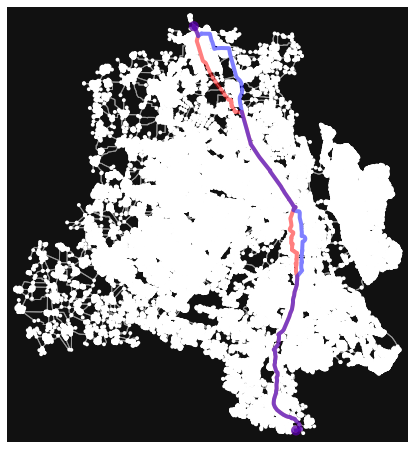

Shortest route by travel distance has, Length = 58920 meter, Travel Time = 4869 seconds AND Shortest route by Travel time has, Length = 60939 meter, Travel Time = 4506 seconds


In [47]:
ax = ox.plot_graph_routes(G, routes = [od1, od2], route_colors = ["red", "blue"])
# length and Travel Time of route
print('Shortest route by travel distance has, Length =',int(sum(ox.utils_graph.get_route_edge_attributes(G,od1,'length'))),'meter,',
      'Travel Time =',int(sum(ox.utils_graph.get_route_edge_attributes(G,od1,'travel_time'))),'seconds', 'AND',
      'Shortest route by Travel time has, Length =',int(sum(ox.utils_graph.get_route_edge_attributes(G,od2,'length'))),'meter,',
      'Travel Time =',int(sum(ox.utils_graph.get_route_edge_attributes(G,od2,'travel_time'))),'seconds')

In [31]:




###############    ISOCHRONES     ###############





In [85]:
## ISOCHRONES WITH OSMNX

import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon

In [92]:
trip_times = [5,15,30, 60]  # Trip time in minutes
travel_speed = 5 #KMPH

In [93]:
# Project the graph to UTM
gdf_nodes = ox.graph_to_gdfs(G, edges = False)
x, y = list(gdf_nodes.x)[2], list(gdf_nodes.y)[2]
center_node = list(G)[2]
x,y,center_node

(77.2175638, 28.6318424, 249782343)

In [94]:
# add an edge attribute for time in minutes required to traverse each edge
meters_per_minute = 5 * 1000 / 60  # km per hour to m per minute ( take travel speed = 5 kmph)
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

In [95]:
iso_colors = ox.plot.get_colors(n = len(trip_times), cmap = 'plasma', start = 0, return_hex = True)

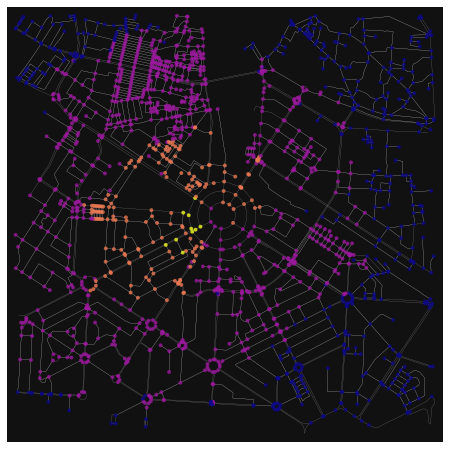

In [96]:
# color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else "none" for node in G.nodes()]
ns = [15 if node in node_colors else 0 for node in G.nodes()]
fig,ax=ox.plot_graph(G,node_color=nc,node_size=ns,node_alpha=0.8,edge_linewidth=0.2,edge_color="#999999")

In [97]:




###############    ISOCHRONES     ###############

In [ ]:


###############    Network components from Edges     ###############



In [98]:
# different types of roads in network
edges['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


residential                      1864
secondary                         662
tertiary                          559
living_street                     352
unclassified                      238
secondary_link                     58
tertiary_link                      18
[tertiary, unclassified]            2
[living_street, unclassified]       2
[residential, unclassified]         2
road                                2
[living_street, residential]        2
[residential, tertiary]             1
[secondary, tertiary]               1
[tertiary, residential]             1
Name: highway, dtype: int64

In [99]:
edges.columns

Index(['osmid', 'oneway', 'name', 'highway', 'length', 'geometry', 'lanes',
       'junction', 'access', 'maxspeed', 'bridge'],
      dtype='object')

In [103]:
edges['bridge'].value_counts()

yes    4
Name: bridge, dtype: int64

In [ ]:


###############    Network Features     ###############



In [108]:
# Extracting other features to the map
building = ox.geometries_from_point(location, dist = 2000, tags = {'building':True})

UnboundLocalError: local variable 'response' referenced before assignment

In [ ]:
building.head()

In [110]:



###############    Network Features     ###############

In [ ]:
# get a GeoSeries of consolidated intersections
G_proj = ox.project_graph(G)
intersections = ox.consolidate_intersections(G_proj, rebuild_graph=False, tolerance=15, dead_ends=False)
len(intersections)

In [24]:
# compare to number of nodes in original graph
len(G)

130357

C:\Users\HP\AppData\Local\Temp/ipykernel_13668/3077075522.py:3: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)


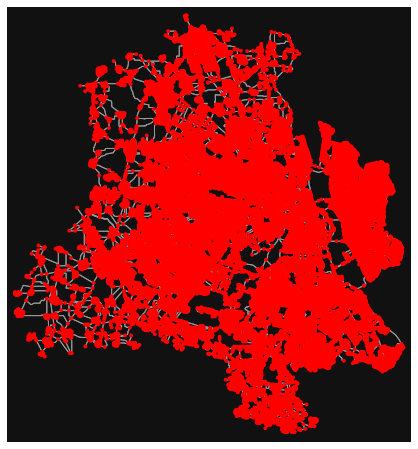

In [25]:
# consolidate intersections and rebuild graph topology
# this reconnects edge geometries to the new consolidated nodes
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G2)
fig, ax = ox.plot_graph(G2, node_color="r")

In [30]:
len(edges)

347738

In [113]:
#######################################                       WebMap                      ###################################################


WebMap = ox.folium.plot_graph_folium(G, graph_map=None, popup_attribute='osmid', tiles='openstreetmap', zoom=1, fit_bounds=True)

In [114]:
WebMap

In [13]:
# save as html file
fp = f"{filepath}/{place}.html"
WebMap.save(fp)





#######################################                       WebMap                      ###################################################

NameError: name 'WebMap' is not defined

In [ ]:


###############    Mean Speeds of road     ###############



In [118]:
# see mean speed/time values by road type
edges1 = ox.graph_to_gdfs(G, nodes=False)

In [119]:
edges1["highway"] = edges1["highway"].astype(str)
table = edges1.groupby("highway")[["length", "speed_kph", "travel_time"]].mean().round(1)

In [120]:
table

length  speed_kph  travel_time
highway                                                          
['living_street', 'residential']     71.9       35.0          7.4
['living_street', 'unclassified']   117.2       35.0         12.1
['residential', 'tertiary']         219.4       40.0         19.7
['residential', 'unclassified']     546.1       40.0         49.1
['secondary', 'tertiary']           108.2       30.0         13.0
['tertiary', 'residential']         219.4       35.0         22.6
['tertiary', 'unclassified']         64.8       35.0          6.7
living_street                        66.3       35.0          6.8
residential                         100.9       40.0          9.1
road                                107.8       35.0         11.1
secondary                           117.7       30.0         14.1
secondary_link                       76.6       35.0          7.9
tertiary                             88.9       35.0          9.1
tertiary_link                        15.6       35.0          1.6
unclassified                         65.9       35.0          6.8

In [102]:
type(table)

geopandas.geodataframe.GeoDataFrame

In [ ]:
import pandas as pd

In [ ]:
#converting to panda dataframe
tables = pd.DataFrame(table)

In [ ]:
type(tables)

pandas.core.frame.DataFrame

In [138]:
# saving panda dataframe to CSV file
tables.to_csv(f"{filepath}/speed_table.csv")

In [ ]:
type(nodes)

geopandas.geodataframe.GeoDataFrame

In [139]:
#Converting geodataframe (geopanda) to panda
delhi_edges = pd.DataFrame(edges)
# saving panda dataframe to csv format in local
delhi_edges.to_csv(f"{filepath}/{place}_edges.csv")

In [ ]:


###############    Circuity     ###############



In [122]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

In [124]:
print('Circuity for Delhi is',ox.stats.circuity_avg(M).round(6),'wchich is',((ox.stats.circuity_avg(M)-1)*100).round(2),'% increase.')


############## Circuity ##############

Circuity for Delhi is 1.034333 wchich is 3.43 % increase.


In [141]:
# Ploting figure for Network
fp = f"{filepath}/{place}.png"
fig, ax = ox.plot.plot_figure_ground(point=location, dist = 2000, network_type="drive",edge_color="white",filepath=fp,save = True,dpi = 40)

UnboundLocalError: local variable 'response' referenced before assignment

In [1]:
#################     Centrality     #################

##    1. Betweenness Centrality



In [2]:
import osmnx as ox
import networkx as nx

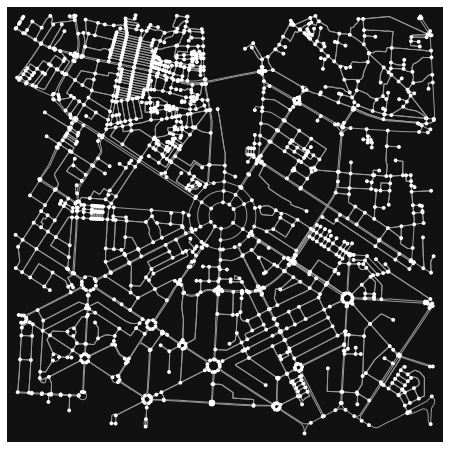

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [142]:
ox.plot_graph(G)

In [144]:
# calculate betweenness centrality with a digraph (no parallel edges)
centrality = nx.betweenness_centrality(D, weight = 'length')
max_node, max_bc = max(centrality.items(), key=lambda x: x[1])
max_node, max_bc

(249783308, 0.15527941015468397)

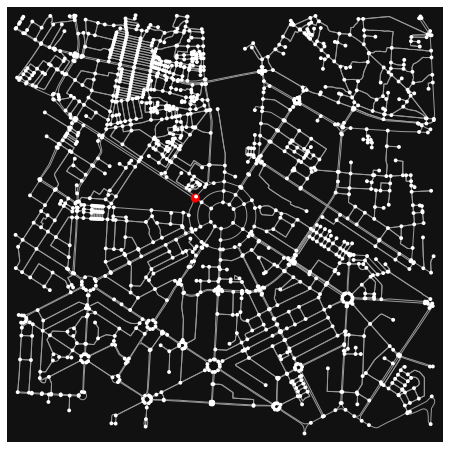

Node 249783308 has highest 'betweenness Centrality', and
15.53 % of shortest path pass through this node.


In [146]:
# find out node and plot on graph
node_color = ['red' if node == max_node else 'white' for node in G.nodes]
node_size = [80 if node == max_node else 15 for node in G.nodes]
ax = ox.plot_graph(G, node_color = node_color, node_size = node_size)
print('Node', max_node, "has highest 'betweenness Centrality', and")
print(round(max_bc*100,2), '% of shortest path pass through this node.')

In [148]:


##    2. Closeness Centrality



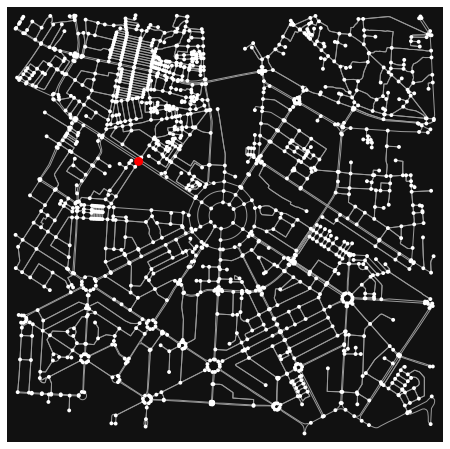

Node 1869716959 has lowest 'closeness Centrality' of 5.42 %.


In [149]:
# calculate betweenness with a digraph (no parallel edges)
centrality = nx.closeness_centrality(D)
max_node, max_bc = max(centrality.items(), key=lambda x: x[1])
max_node, max_bc

# find out node and plot on graph
node_color = ['red' if node == max_node else 'white' for node in G.nodes]
node_size = [80 if node == max_node else 15 for node in G.nodes]
ax = ox.plot_graph(G, node_color = node_color, node_size = node_size)
print('Node', max_node, "has lowest 'closeness Centrality' of",round(max_bc*100,2),'%.' )

In [153]:


##    3. information Centrality



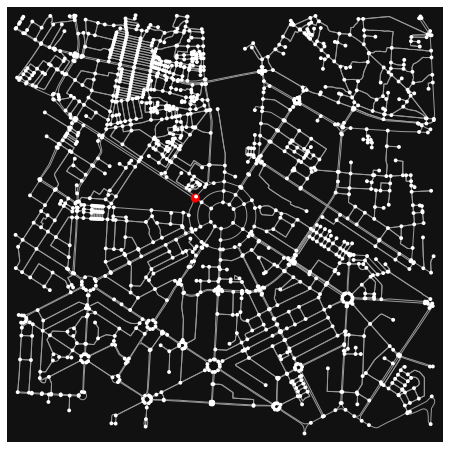

Node 249783308 has maximum 'information Centrality' of 0.0222 %.


In [154]:
# calculate betweenness with a digraph (no parallel edges) M = undirected Graph
centrality = nx.information_centrality(M)
max_node, max_bc = max(centrality.items(), key=lambda x: x[1])
max_node, max_bc

# find out node and plot on graph
node_color = ['red' if node == max_node else 'white' for node in G.nodes]
node_size = [80 if node == max_node else 15 for node in G.nodes]
ax = ox.plot_graph(G, node_color = node_color, node_size = node_size)
print('Node', max_node, "has maximum 'information Centrality' of",round(max_bc*100,4),'%.' )

In [155]:


##    4. Straightness Centrality (inverse of average circuity )



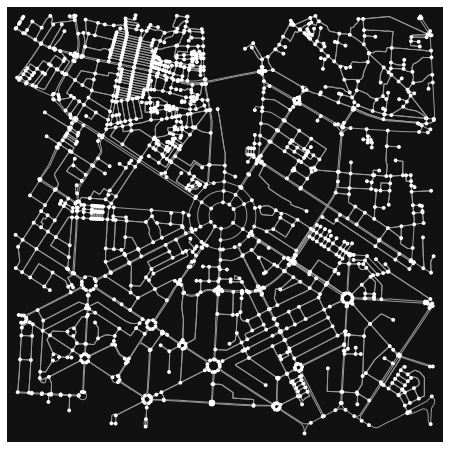

Straightness Centrality for given network is 96.68 %.


In [156]:
ox.plot_graph(G)
circuity = ox.stats.circuity_avg(M).round(5)
print('Straightness Centrality for given network is',(100/circuity).round(2),'%.')


In [157]:



#################     Centrality     #################

In [158]:
print(centrality)

{249782331: 0.0002122655021300342, 249782337: 0.00020410764589623697, 249782343: 0.0002047990802830876, 249782349: 0.00021804207771759123, 249783257: 0.00020084816430036422, 249783291: 0.00018870196028298287, 249783293: 0.00020769835760089104, 249783302: 0.00020677952133798855, 249783308: 0.00022216990414684217, 249783313: 0.0002061852599029041, 249783316: 0.00021464966390525214, 249786848: 0.0001825951400918037, 249786894: 0.00016483124621672718, 249786895: 0.00016207287790281647, 249786899: 0.00017712898862657587, 249786900: 0.00017186396876692436, 249786902: 0.00015525446203498198, 249791934: 0.00015732780439010446, 267075193: 0.0001478853133005879, 267075194: 0.0001480437970676069, 267075233: 0.00016038342670312598, 267196295: 0.00016074157927238697, 267196297: 0.0001533572104792754, 267196303: 0.00014258996346284982, 267196304: 0.00015783948508506565, 267196305: 0.00016524612550712541, 267196308: 0.00015571147459464448, 267196309: 0.00015870198866141394, 267196314: 0.0001589162874

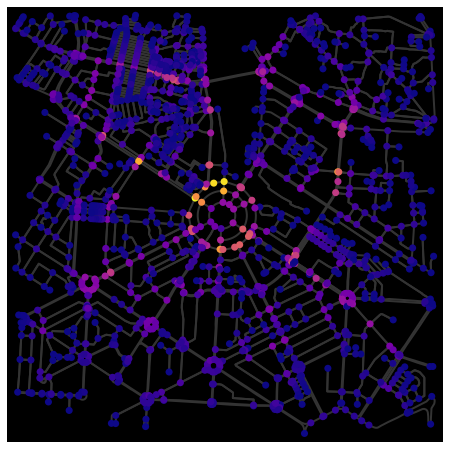

In [159]:
# calculate node betweenness centrality, weighted by travel time
bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
nx.set_node_attributes(G, values=bc, name="bc")

# plot the graph, coloring nodes by betweenness centrality
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(G, bgcolor="black", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333")

In [166]:
############     Degree of each node    #############
G.degree()

DiMultiDegreeView({249782331: 4, 249782337: 3, 249782343: 3, 249782349: 4, 249783257: 3, 249783291: 3, 249783293: 4, 249783302: 4, 249783308: 4, 249783313: 3, 249783316: 5, 249786848: 3, 249786894: 3, 249786895: 3, 249786899: 3, 249786900: 3, 249786902: 3, 249791934: 3, 267075193: 3, 267075194: 4, 267075233: 3, 267196295: 3, 267196297: 3, 267196303: 4, 267196304: 3, 267196305: 6, 267196308: 4, 267196309: 4, 267196314: 4, 267196319: 4, 267196320: 6, 267196336: 8, 267196337: 8, 267196340: 2, 267197815: 3, 267197828: 3, 267197829: 6, 267197830: 4, 267197831: 6, 267197832: 6, 267198388: 3, 267198390: 4, 267198392: 4, 267198394: 3, 267247452: 6, 267247454: 6, 267247456: 6, 267247460: 4, 267247462: 6, 267247464: 6, 267247468: 6, 267249900: 3, 267249902: 3, 267249903: 3, 267249905: 3, 267249911: 3, 267249912: 3, 267249914: 3, 267249915: 3, 267249920: 3, 267249923: 3, 267249926: 3, 267249927: 3, 267249930: 3, 267249941: 4, 267249943: 3, 267249944: 3, 267249954: 4, 267249955: 3, 267249959: 3, 2

In [172]:
degree = list(G.degree())

list